In [2]:
# Carregar as bibliotecas necessárias para o projeto

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as mp
import matplotlib_inline as plt


In [3]:
#Carregar a base de dados para analise e eliminar os argumentos desnecessarios


base = pd.read_csv('Loan.csv')

base = base.drop(columns=['UtilityBillsPaymentHistory', 'TotalDebtToIncomeRatio', 'CheckingAccountBalance',
                 'JobTenure', 'BaseInterestRate', 'CheckingAccountBalance', 'LengthOfCreditHistory', 'SavingsAccountBalance',
                          'PreviousLoanDefaults', 'PaymentHistory', 'BankruptcyHistory', 'DebtToIncomeRatio', 'NumberOfCreditInquiries',
                          'CreditCardUtilizationRate', 'NumberOfDependents', 'MonthlyDebtPayments'])

base.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,NumberOfOpenCreditLines,LoanPurpose,TotalAssets,TotalLiabilities,MonthlyIncome,NetWorth,InterestRate,MonthlyLoanPayment,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,1,Home,146111,19183,3329.000000,126928,0.227590,419.805992,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,5,Debt Consolidation,53204,9595,3309.083333,43609,0.201077,794.054238,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,2,Education,25176,128874,3393.666667,5205,0.212548,666.406688,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,2,Home,104822,5370,5757.000000,99452,0.300911,1047.506980,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,0,Debt Consolidation,244305,17286,8605.333333,227019,0.175990,330.179140,1,36.0


In [4]:

# Renomear as colunas

base.columns = ['Data_Aplicacao', 'Idade', 'RendaAnual', 'CreditScore', 'Empregabilidade',
                'NivelAcademico', 'Experiencia', 'MontanteEmprestado', 'DuracacaoCredito',
                'EstadoCivil', 'CasaPropria','CreditoAbertos',  'Finalidade', 'AtivoTotal', 'PassivoTotal',
                'RendaMensal', 'Patrimonio', 'TaxaJuro', 'PrestacaoMensal',  'Aprovacao',
                'NivelRisco', ]
                


base.head()

,Data_Aplicacao,Idade,RendaAnual,CreditScore,Empregabilidade,NivelAcademico,Experiencia,MontanteEmprestado,DuracacaoCredito,EstadoCivil,...,CreditoAbertos,Finalidade,AtivoTotal,PassivoTotal,RendaMensal,Patrimonio,TaxaJuro,PrestacaoMensal,Aprovacao,NivelRisco
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,1,Home,146111,19183,3329.000000,126928,0.227590,419.805992,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,5,Debt Consolidation,53204,9595,3309.083333,43609,0.201077,794.054238,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,2,Education,25176,128874,3393.666667,5205,0.212548,666.406688,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,2,Home,104822,5370,5757.000000,99452,0.300911,1047.506980,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,0,Debt Consolidation,244305,17286,8605.333333,227019,0.175990,330.179140,1,36.0


In [5]:
# Estatistica da nossa base de dados 

round(base.describe())


,Idade,RendaAnual,CreditScore,Experiencia,MontanteEmprestado,DuracacaoCredito,CreditoAbertos,AtivoTotal,PassivoTotal,RendaMensal,Patrimonio,TaxaJuro,PrestacaoMensal,Aprovacao,NivelRisco
count,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0
mean,40.0,59161.0,572.0,18.0,24883.0,54.0,3.0,96964.0,36252.0,4892.0,72294.0,0.0,912.0,0.0,51.0
std,12.0,40351.0,51.0,11.0,13427.0,25.0,2.0,120800.0,47252.0,3297.0,117920.0,0.0,675.0,0.0,8.0
min,18.0,15000.0,343.0,0.0,3674.0,12.0,0.0,2098.0,372.0,1250.0,1000.0,0.0,97.0,0.0,29.0
25%,32.0,31679.0,540.0,9.0,15575.0,36.0,2.0,31180.0,11197.0,2630.0,8735.0,0.0,494.0,0.0,46.0
50%,40.0,48566.0,578.0,17.0,21914.0,48.0,3.0,60699.0,22203.0,4035.0,32856.0,0.0,729.0,0.0,52.0
75%,48.0,74391.0,609.0,25.0,30835.0,72.0,4.0,117405.0,43146.0,6163.0,88826.0,0.0,1113.0,0.0,56.0
max,80.0,485341.0,712.0,61.0,184732.0,120.0,13.0,2619627.0,1417302.0,25000.0,2603208.0,0.0,10893.0,1.0,84.0


In [6]:
# Verificando valores unicos no base

base.isnull().sum()

Data_Aplicacao        0
Idade                 0
RendaAnual            0
CreditScore           0
Empregabilidade       0
NivelAcademico        0
Experiencia           0
MontanteEmprestado    0
DuracacaoCredito      0
EstadoCivil           0
CasaPropria           0
CreditoAbertos        0
Finalidade            0
AtivoTotal            0
PassivoTotal          0
RendaMensal           0
Patrimonio            0
TaxaJuro              0
PrestacaoMensal       0
Aprovacao             0
NivelRisco            0
dtype: int64

In [7]:
#Verificar valores unicos dentro da nossa base
valores_unicos = []
for i in base.columns[0:21].tolist():
    print(i, ':', len(base[i].astype(str).value_counts()))
    valores_unicos.append(len(base[i].astype(str).value_counts()))

Data_Aplicacao : 20000
Idade : 63
RendaAnual : 17516
CreditScore : 322
Empregabilidade : 3
NivelAcademico : 5
Experiencia : 62
MontanteEmprestado : 15578
DuracacaoCredito : 10
EstadoCivil : 4
CasaPropria : 4
CreditoAbertos : 14
Finalidade : 5
AtivoTotal : 18814
PassivoTotal : 17163
RendaMensal : 17489
Patrimonio : 17724
TaxaJuro : 19999
PrestacaoMensal : 20000
Aprovacao : 2
NivelRisco : 73


In [8]:
# Tipo de dados existentes para analise 
base.dtypes

Data_Aplicacao         object
Idade                   int64
RendaAnual              int64
CreditScore             int64
Empregabilidade        object
NivelAcademico         object
Experiencia             int64
MontanteEmprestado      int64
DuracacaoCredito        int64
EstadoCivil            object
CasaPropria            object
CreditoAbertos          int64
Finalidade             object
AtivoTotal              int64
PassivoTotal            int64
RendaMensal           float64
Patrimonio              int64
TaxaJuro              float64
PrestacaoMensal       float64
Aprovacao               int64
NivelRisco            float64
dtype: object

In [9]:
#Contagem dos aprovados e reprovados 

base['Aprovacao'].value_counts()

Aprovacao
0    15220
1     4780
Name: count, dtype: int64

In [34]:
pd.crosstab(base['Aprovacao'], base['Finalidade'])

Finalidade,Auto,Debt Consolidation,Education,Home,Other
Aprovacao,,,,,
0,3055,3845,2247,4515,1558
1,979,1182,761,1410,448


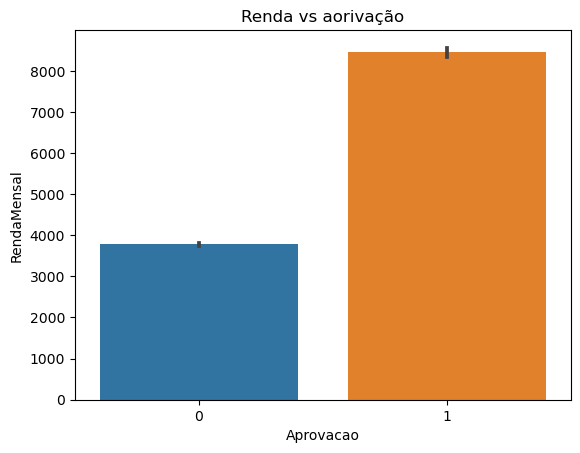

In [10]:
#Quantidade de aprovados em função da renda mensal

base.groupby('Aprovacao')['RendaMensal'].mean()


sn.barplot(x='Aprovacao', y='RendaMensal', data=base)
mp.title('Renda vs aorivação')
mp.show()


In [11]:
base.groupby(['AtivoTotal']).value_counts()

AtivoTotal  Data_Aplicacao  Idade  RendaAnual  CreditScore  Empregabilidade  NivelAcademico  Experiencia  MontanteEmprestado  DuracacaoCredito  EstadoCivil  CasaPropria  CreditoAbertos  Finalidade  PassivoTotal  RendaMensal  Patrimonio  TaxaJuro  PrestacaoMensal  Aprovacao  NivelRisco
2098        2051-01-18      48     71174       582          Employed         Associate       28           49511               12                Divorced     Mortgage     4               Education   156186        5931.166667  9043        0.225280  4646.541574      0          51.0          1
2370        2070-01-15      55     37060       579          Self-Employed    High School     32           31907               48                Married      Own          3               Home        12729         3088.333333  5423        0.232550  1027.129789      0          64.0          1
2505        2060-12-24      54     50821       592          Employed         Associate       31           34589               84    

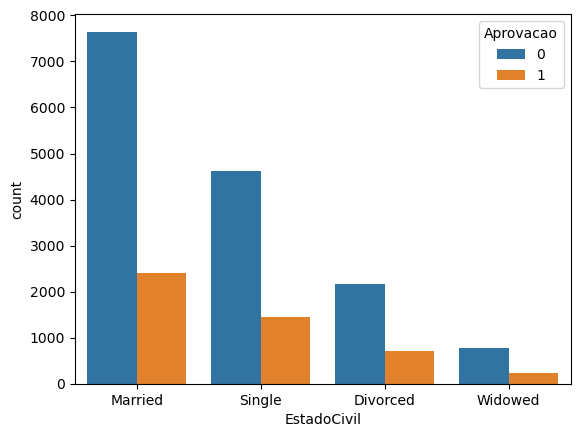

In [12]:
#base.groupby('Aprovacao')['EstadoCivil'].mean()

sn.countplot(data=base, x='EstadoCivil', hue='Aprovacao')
mp.show()

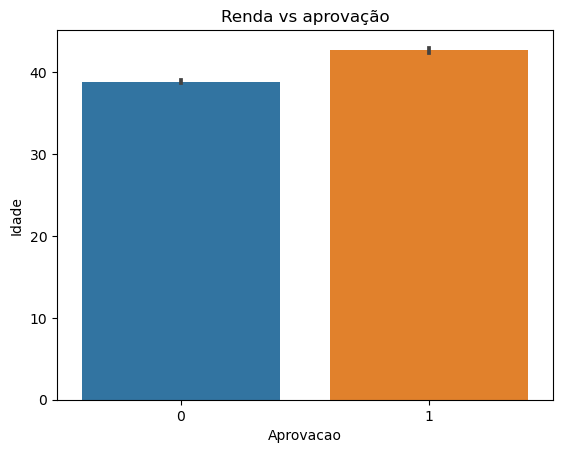

In [13]:
# Quantidade de aprovados em função da Idade
base.groupby('Aprovacao')['Idade'].mean()

sn.barplot(x='Aprovacao', y= 'Idade', data = base)
mp.title('Renda vs aprovação')
mp.show()

In [14]:
# carregar variaveis para plot
variaveis_numericas = []
for i in base.columns[0:21].tolist():
    if base.dtypes[i] == 'int64' or base.dtypes[i] == 'float64':
        variaveis_numericas.append(i)

In [16]:
variaveis_numericas
len(variaveis_numericas)

15

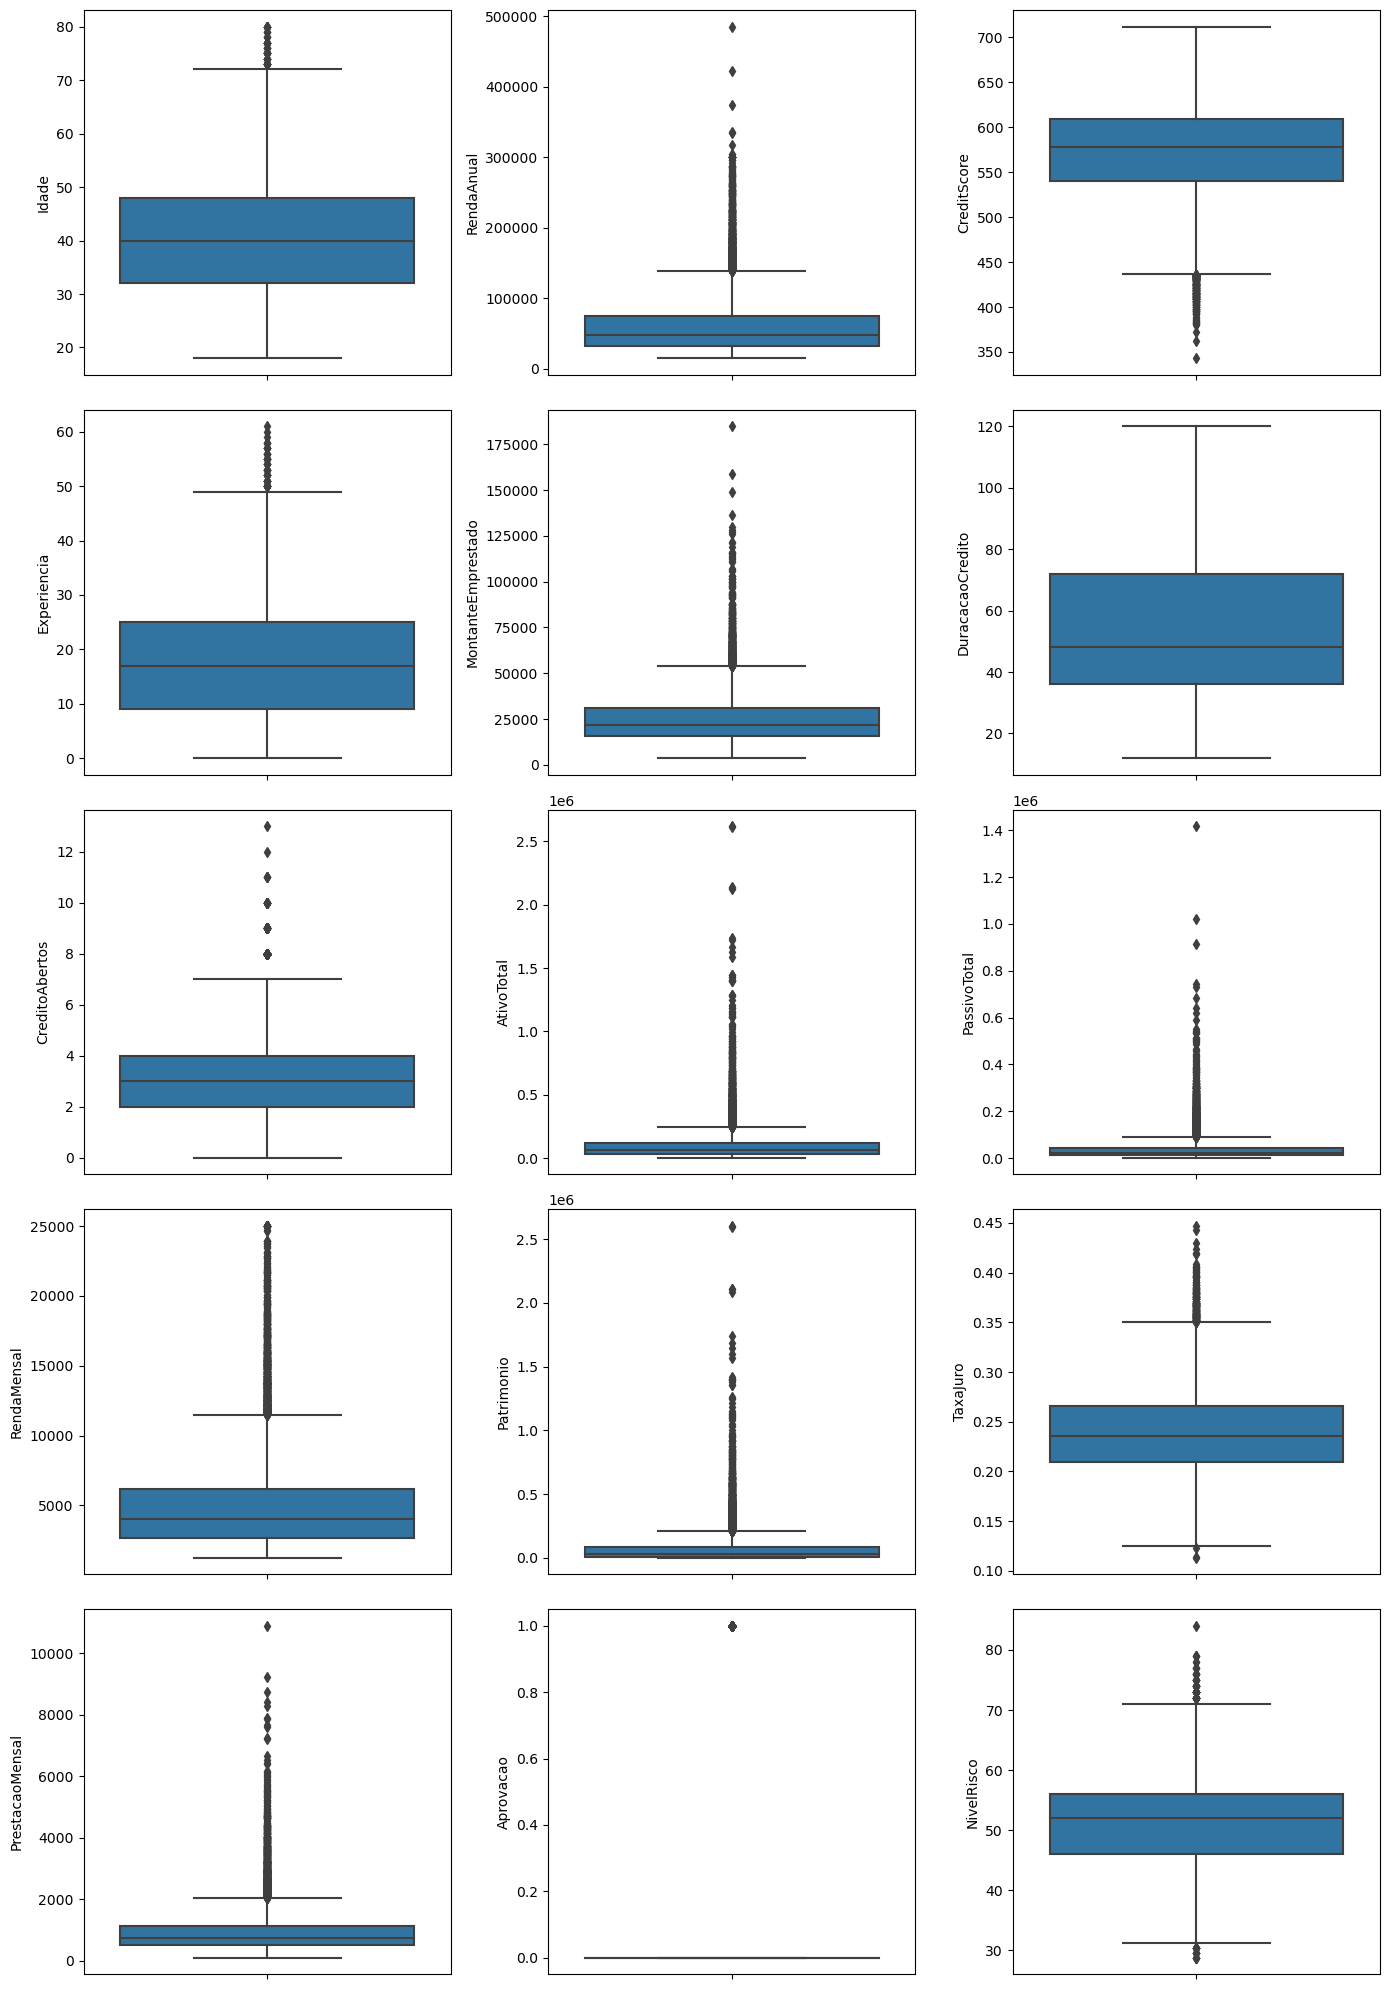

In [27]:
# Podemos observar nos boxplots abaixo que as variáveis númericas apresentam uma grande quantidade de "possíveis" outliers
# Precisamos avaliar cada uma dessas variaveis dentro do contexto dos dados para saber se realmente iremos trata-las como outlier

mp.rcParams["figure.figsize"] = [14.00, 20.00]
mp.rcParams["figure.autolayout"] = True
f, axes = mp.subplots(5, 3)  # 10 linhas e 3 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sn.boxplot(data=base, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0

mp.show()

In [15]:
#Criar uma base separada para correlacionar

base_especifica = ['RendaAnual', 'CreditScore', 'RendaMensal', 'MontanteEmprestado', 'Patrimonio', 
                   'Aprovacao', 'PassivoTotal', 'AtivoTotal']

base_especifica = base[base_especifica]
base_especifica.head()
Correlacao = base_especifica.corr()



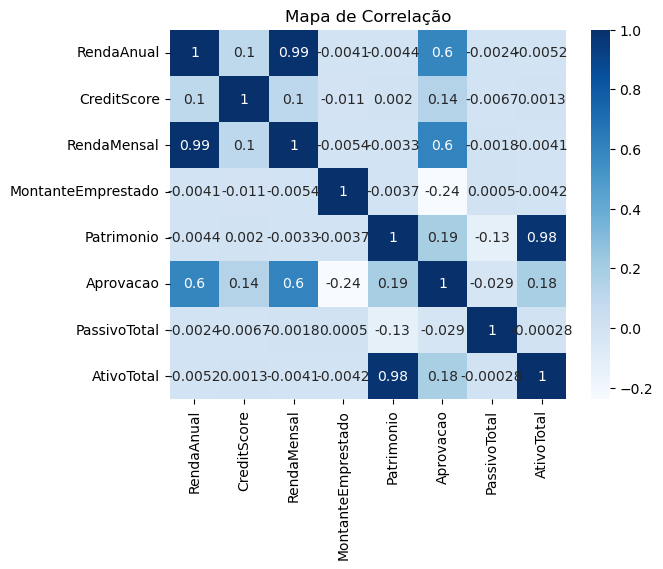

In [48]:
# Grafico de correlacao 

sn.heatmap (Correlacao, annot=True, cmap = 'Blues' )
mp.title ('Mapa de Correlação')
mp.show()

In [29]:
base.shape


(20000, 21)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [50]:
base_dummy = pd.get_dummies(base['EstadoCivil'], prefix='EstadoCivil')
base = pd.concat([base, base_dummy], axis=1)
display(base)

,Data_Aplicacao,Idade,RendaAnual,CreditScore,Empregabilidade,NivelAcademico,Experiencia,MontanteEmprestado,DuracacaoCredito,EstadoCivil,...,Aprovacao,NivelRisco,EstadoCivil_Divorced,EstadoCivil_Married,EstadoCivil_Single,EstadoCivil_Widowed,EstadoCivil_Divorced,EstadoCivil_Married,EstadoCivil_Single,EstadoCivil_Widowed
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,0,49.0,False,True,False,False,False,True,False,False
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,0,52.0,False,False,True,False,False,False,True,False
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,0,52.0,False,True,False,False,False,True,False,False
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,0,54.0,False,False,True,False,False,False,True,False
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,1,36.0,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,0,55.0,False,True,False,False,False,True,False,False
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,0,54.0,False,True,False,False,False,True,False,False
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,0,45.0,False,True,False,False,False,True,False,False
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,0,59.0,False,True,False,False,False,True,False,False


In [51]:
# Variaveis para teste 
X = base[[ 'RendaMensal', 'EstadoCivil_Single']]
Y = base['Aprovacao']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

model = LogisticRegression()
model.fit(X_train, Y_train) 


y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
display(accuracy)


0.8425